In [24]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob as gb
from sklearn import svm
from sklearn import metrics

### training information

In [25]:
labels = ["buildings", "forest"]
training_images = []
training_labels = []
idx = 0
class_label = 0
train = "training/"
for folder in  os.listdir(train) :
    print(folder)
    files = gb.glob(pathname= str( train + folder + '/*.jpg'))
    for image in files:
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv.resize(data , (32,32))
        training_images.append(list(image_array))
        training_labels.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

buildings
forest


In [26]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)
print(training_images.shape)
print(training_labels.shape)

(5373, 32, 32)
(5373,)


In [27]:
training_images = training_images.reshape(len(training_images), -1)
training_images.shape

(5373, 1024)

### testing information

In [28]:
labels = ["buildings", "forest"]
testing_images = []
testing_labels = []
idx = 0
class_label = 0
test = "testing/"
for folder in  os.listdir(test):
    print(folder)
    files = gb.glob(pathname= str( test + folder + '/*.jpg'))
    for image in files:
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv.resize(data , (32,32))
        testing_images.append(list(image_array))
        testing_labels.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

buildings
forest


In [29]:
testing_images = np.array(testing_images)
testing_labels = np.array(testing_labels)
print(testing_images.shape)
print(testing_labels.shape)

(480, 32, 32)
(480,)


In [30]:
testing_images = testing_images.reshape(len(testing_images), -1)
testing_images.shape

(480, 1024)

In [31]:
model = svm.SVC(kernel='rbf',max_iter=950)
result = model.fit(training_images, training_labels)

C:\MyAnaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=950).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [32]:
prediction = model.predict(testing_images)
acc = metrics.accuracy_score(testing_labels, prediction)
print (f"Accuracy = {round(acc*100,2)} %")

Accuracy = 95.21 %


### visualization

C:\MyAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\MyAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\MyAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\MyAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Est

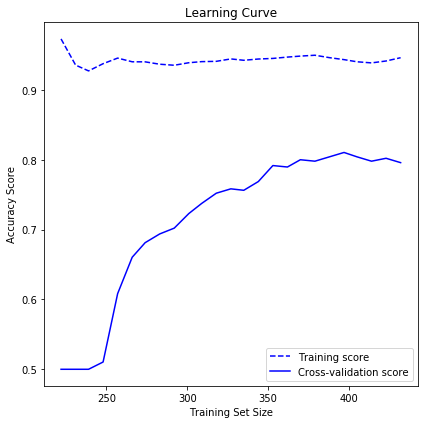

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model,
                                                        testing_images, testing_labels, cv=10, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20ef04b8bc8>)

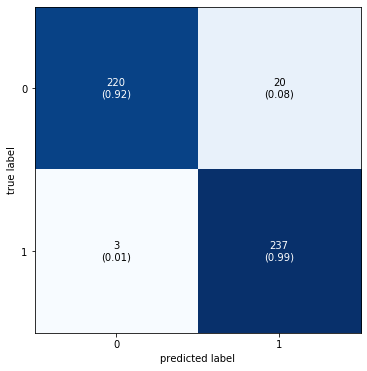

In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_labels,prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(6,6),
                     show_normed = True)

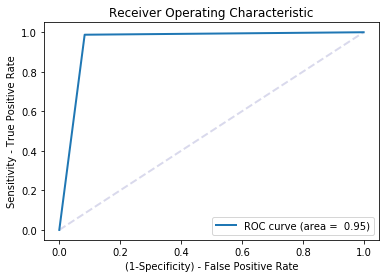

In [35]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(testing_labels, prediction)
roc_auc = metrics.auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.15)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.2f})')

plt.xlabel('(1-Specificity) - False Positive Rate')
plt.ylabel('Sensitivity - True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()